15th

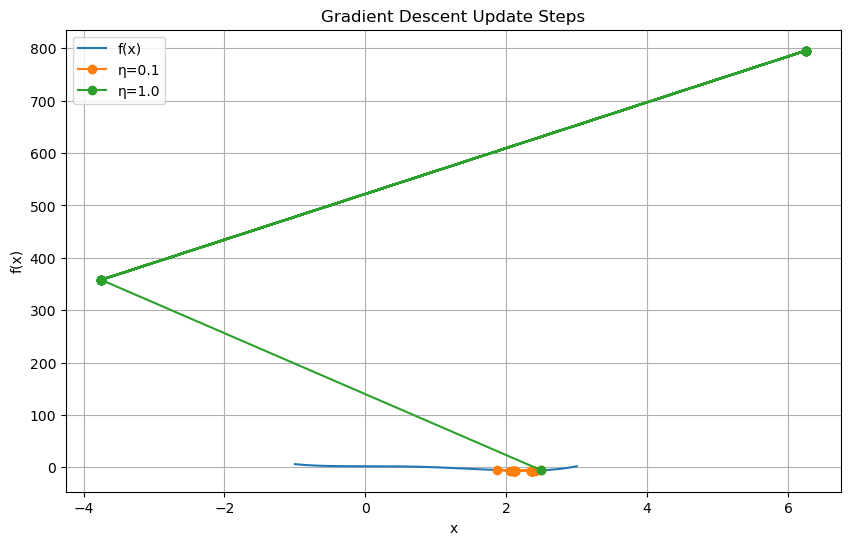

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 3*x**3 + 2

def grad_f(x):
    return 4*x**3 - 9*x**2

def gradient_descent(eta, x0, iterations=50, clip_threshold=10, divergence_limit=1e6):
    x = x0
    history = [x]
    
    for _ in range(iterations):
        grad = grad_f(x)
        grad = np.clip(grad, -clip_threshold, clip_threshold)  # Clip gradients
        x = x - eta * grad
        history.append(x)
        
        # Stop if values explode
        if abs(x) > divergence_limit:
            print(f"Divergence detected for η={eta}, stopping early at iteration {_}")
            break
    
    return np.array(history)

# Initial point
x0 = 2.5
learning_rates = [0.1, 1.0]  # Removed 10.0 to avoid instability
iterations = 20

# Plot function
x_vals = np.linspace(-1, 3, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')

for eta in learning_rates:
    history = gradient_descent(eta, x0, iterations)
    plt.plot(history, f(history), marker='o', linestyle='-', label=f'η={eta}')
    
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Update Steps')
plt.legend()
plt.grid()
plt.show()
